In [80]:
import pandas as pd
import numpy as np
import plotly.express as px
from datetime import timedelta
import datetime
import pytz

In [2]:
spx = pd.read_parquet("SPX.parquet")
vix = pd.read_parquet("VIX4y.parquet")

In [3]:
spx = spx.set_index("date")
vix = vix.set_index("date")

In [4]:

spx_1h = pd.DataFrame(spx["close"].resample("1h").mean().dropna().astype("float32"))
vix_1h = vix["close"].resample("1h").mean().dropna().astype("float32")
#spx_1d = spx["close"].resample("1d").mean().dropna().astype("float32")

In [5]:
spx_1h.info(), vix_1h.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8754 entries, 2020-10-19 15:00:00+02:00 to 2025-10-16 20:00:00+02:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   8754 non-null   float32
dtypes: float32(1)
memory usage: 102.6 KB
<class 'pandas.core.series.Series'>
DatetimeIndex: 14029 entries, 2021-10-18 09:00:00+02:00 to 2025-10-16 20:00:00+02:00
Series name: close
Non-Null Count  Dtype  
--------------  -----  
14029 non-null  float32
dtypes: float32(1)
memory usage: 164.4 KB


(None, None)

In [6]:
spx_1h["ma5"] = spx_1h["close"].rolling(5).mean().round(2)
spx_1h["ma20"] = spx_1h["close"].rolling(20).mean().round(2)
#spx_1h["ma20"] = spx_1h.rolling(20).mean().round(2)

In [7]:
spx_1h[19:]

,close,ma5,ma20
date,,,
2020-10-21 20:00:00+02:00,3457.790039,3445.47,3455.28
2020-10-21 21:00:00+02:00,3435.129883,3442.71,3452.34
2020-10-22 15:00:00+02:00,3443.590088,3443.36,3450.52
2020-10-22 16:00:00+02:00,3430.939941,3442.19,3448.49
2020-10-22 17:00:00+02:00,3431.340088,3439.76,3446.52
...,...,...,...
2025-10-16 16:00:00+02:00,6693.450195,6680.12,6664.41
2025-10-16 17:00:00+02:00,6666.810059,6680.33,6664.48
2025-10-16 18:00:00+02:00,6656.060059,6675.59,6664.51


In [8]:
spx_1h = spx_1h.join(vix_1h, how="left", rsuffix="_vix").dropna()

<Axes: >

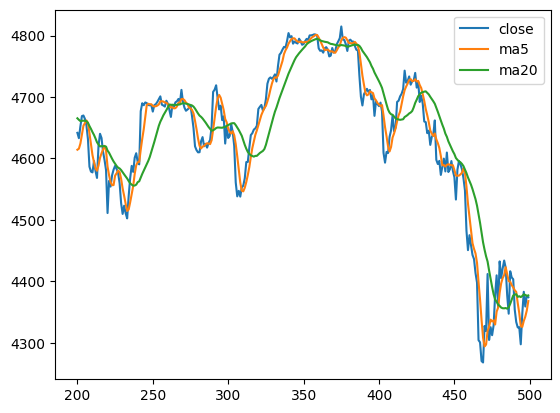

In [9]:
spx_1h.reset_index()[["close", "ma5", "ma20"]][200:500].plot()

In [103]:
fig = px.line(spx_1h.tz_localize(None).loc[test:test + timedelta(weeks=13)].reset_index(), y=["close", "ma5", "ma20"], title="SPX_1h_lines")

In [104]:
fig.show()

In [ ]:
start_dates = [d.date() for d in spx_1h.index if d.weekday() == 4]
start_dates = sorted(list(set(start_dates)))
start_dates = 

In [88]:
test = datetime.datetime(start.year, start.month, start.day)

In [94]:
spx_1h.tz_localize(None).loc[test:test + timedelta(weeks=2)]

,close,ma5,ma20,close_vix
date,,,,
2022-10-21 15:00:00,3700.909912,3678.51,3698.28,29.750000
2022-10-21 16:00:00,3677.320068,3676.19,3696.99,29.900000
2022-10-21 17:00:00,3709.399902,3683.90,3696.68,29.320000
2022-10-21 18:00:00,3723.080078,3695.19,3696.27,29.730000
2022-10-21 19:00:00,3736.050049,3709.35,3697.83,29.809999
...,...,...,...,...
2022-11-03 16:00:00,3726.810059,3749.96,3829.88,25.799999
2022-11-03 17:00:00,3748.399902,3735.95,3823.28,25.350000
2022-11-03 18:00:00,3732.250000,3730.58,3815.97,25.420000


In [63]:
start = start_dates[50]
stop = start + timedelta(weeks=14)

In [66]:
spx_1h.index.between(start, stop)

AttributeError: 'DatetimeIndex' object has no attribute 'between'

In [26]:
test

Timestamp('2021-10-18 20:00:00+0200', tz='Europe/Berlin')